1. Understanding problem statement
   Using Heart Disease dataset from UCI repository
   Predict whether a patient is suffering from a heary disease ailment or not by using the given dataset
   
FOCUS - Model Evaluation metrics  

In [1]:
# Import necessary libraries and packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
# take a look at data and target variables
data_df = pd.read_csv('heart.csv')

data_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
# check for any missing values

data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

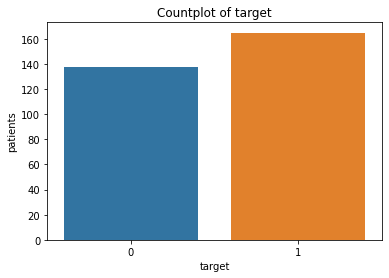

In [4]:
# check how many patients are actually suffering from heart desease(1) and how many are not(0)

sns.countplot(data_df['target']) # distribution of target_variables


# add labels
plt.title("Countplot of target")
plt.xlabel('target')
plt.ylabel('patients')

plt.show()



In [5]:
y = data_df["target"].values
x = data_df.drop(["target"], axis = 1)

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

In [6]:
# Evaluate the training and testing scores for upto 20 nearest neighbors

train_score = []
test_score = []
k_vals = []

for k in range (1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    ts_score = knn.score(X_test, y_test)
    test_score.append(ts_score)

In [7]:
# evaluate the max test score and the k values associated with it


## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 84.61538461538461 and k = [6, 19]


In [8]:
# setup knn classier with k neighbors

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.8241758241758241

In [9]:
# Use confusion matrix to evaluate if the model is good or not

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted   0   1  All
Actual                
0          28  13   41
1           3  47   50
All        31  60   91

* The patients who actually don’t have a heart disease = 45
* The patients who actually do have a heart disease = 46

* Number of patients who were predicted as not having a heart disease = 44
* Number of patients who were predicted as having a heart disease = 47

1. The cases in which the patients actually did not have heart disease and our model also predicted as not having it is called the True Negatives. For our matrix, True Negatives = 39.
2. The cases in which the patients actually have heart disease and our model also predicted as having it are called the True Positives. For our matrix, True Positives = 41
3. However, there are are some cases where the patient actually has no heart disease, but our model has predicted that they do. This kind of error is the Type I Error and we call the values as False Positives. For our matrix, False Positives = 6
4. Similarly, there are are some cases where the patient actually has heart disease, but our model has predicted that he/she don’t. This kind of error is the Type II Error and we call the values as False Negatives.  For our matrix, False Negatives = 5

# Precision
 The ratio between True positive and all positives
 
 Precision = True Positive/(True Positive(TP) +False Positive(FP))
 
 
 precision = 41/(41+6)
 
           = 0.872
           
           
1. When the model predicts that a patient has heart disease, it is correct around 87% of the time.
 
2. Precision gives measure of relevant data points; It is important that we don’t start treating a patient who actually doesn’t have a heart ailment, but our model predicted as having it. 

# Recall
  The measure of our model correctly identifying True Positives
  
  Recall = True Positive(TP)/ True Positive(TP) + False Negative(FN)
  
  
  Recall = 41/(41+5)
  
         = 0.891
         
1. Recall gives a measure of how accurately our model is able to identify the relevant data ;
   Sensitivity or True Positive Rate.
 
2. What if a patient has heart disease, but there is no treatment given to them because our model predicted so? That is a situation we would like to avoid! 



# Accuracy
  Accuracy is the ratio of the total number of correct predictions and the total number of    predictions
  
  
  Accuracy = (True Positive(TP) + True Negative(TN)/ ( TP + TN + FP + FN)
  
           = ( 41 + 39) /(41 + 39 + 6 + 5 )
           = 0.8791
           = 0.88
  
  
  Using accuracy as a defining metric for our model does make sense intuitively, but more often than not, it is always advisable to use Precision and Recall too. 

# Role of F1 Score
   
   Understanding Accuracy made us realize, we need a tradeoff between Precision and Recall. 
   We first need to decide which is more important for our classification problem
   
   For our dataset, we can consider that achieving a high recall is more important than getting a high precision – we would like to detect as many heart patients as possible.
  
  
 1. F1-score is the Harmonic mean of the Precision and Recall:
  
  F1-score = 2 *(Precision * Recall)/ (Precision + Recall)
  
           =  2 * ( 0.872 * 0.891) / ( 0.872 + 0.891
           =  0.8813
           
           
           
2. This is easier to work with since now, instead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well           

In [10]:
# Generating the above metrics for our dataset

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        41
           1       0.78      0.94      0.85        50

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.84      0.82      0.82        91



# ROC Curve

  * False Positive Rate (FPR): It is the ratio of the False Positives to the Actual number of Negatives. In the context of our model, it is a measure for how many cases did the model predicts that the patient has a heart disease from all the patients who actually didn’t have the heart disease.  For our data, the FPR is = 0.154

 * True Negative Rate (TNR) or the Specificity: It is the ratio of the True Negatives and the Actual Number of Negatives. For our model, it is the measure for how many cases did the model correctly predict that the patient does not have heart disease from all the patients who actually didn’t have heart disease. The TNR for the above data = 0.75. From these 2 definitions, we can also conclude that Specificity or TNR = 1 – FPR
 
 
 
 1. ROC Curves(Receiver Operating Characteristic Curve):
    It is the plot between the TPR(y-axis) and FPR(x-axis).
    
    

In [14]:
# ROC curve for our model with k = 3.

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



In [12]:
roc_auc_score(y_test, y_pred_proba)

0.8841463414634146

2. Precision-Recall Curve (PRC)

   this curve is a direct representation of the precision(y-axis) and the recall(x-axis)

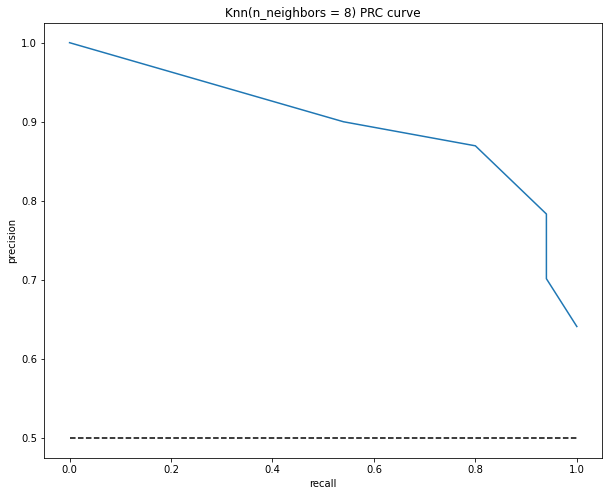

In [13]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

1. At the lowest point, i.e. at (0, 0)- the threshold is set at 1.0. This means our model makes no distinctions between the patients who have heart disease and the patients who don’t.
2. At the highest point i.e. at (1, 1), the threshold is set at 0.0. This means that both our precision and recall are high and the model makes distinctions perfectly.
3. The rest of the curve is the values of Precision and Recall for the threshold values between 0 and 1. Our aim is to make the curve as close to (1, 1) as possible- meaning a good precision and recall.
4. Similar to ROC, the area with the curve and the axes as the boundaries is the Area Under Curve(AUC). Consider this area as a metric of a good model. The AUC ranges from 0 to 1. Therefore, we should aim for a high value of AUC. Let us compute the AUC for our model and the above plot:

In [15]:
# calculate precision-recall AUC

auc_prc = auc(recall, precision)
print(auc_prc)

0.8990219221617664
